In [1]:
using DataFrames, CSV, Gadfly, Compose

In [2]:
wpath = "runs/20180503_063608_Sensibility_Abundance_in_Source/"
csvname = "abundance_sensibility_dataset.csv"
df_sym = CSV.read(wpath*csvname,nullable=false);

In [5]:
parameter=:abund_source

#df_sym[:migration_rate]=convert(Array{Int},log10(df_sym[:migration_rate] ))

:abund_source

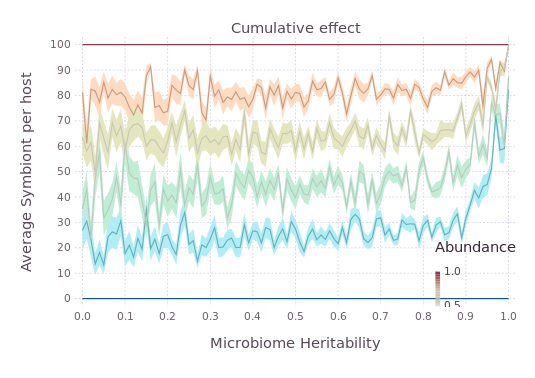

In [8]:
p = plot(df_sym, 
x=:Herit, y=:means, 
    ymin=:ymin, ymax=:ymax,
    color=parameter,
Guide.title("Cumulative effect"),
Guide.xlabel("Microbiome Heritability"),
Guide.xticks(ticks=[0:0.1:1;]),
Guide.ylabel("Average Symbiont per host"),
Guide.yticks(ticks=[0:Int(100/10):100;]),
Guide.colorkey(title="Abundance in Source",pos=[0.8w,0.4h]),
    Geom.line, Geom.ribbon)
draw(SVG(wpath*"/Abundance_on_Heritability_Curve.svg",30cm,30cm),p)
draw(PNG(wpath*"/Abundance_on_Heritability_Curve.png",30cm,30cm),p)
display(p)